In [52]:
import robin_stocks as r
import configparser
config = configparser.RawConfigParser()
configFilePath = '/Users/philipmassey/.tokens/robinhood.cfg'
config.read(configFilePath)
rhuser = config.get('login', 'user')
rhpwd = config.get('login', 'pwd')
login = r.login(rhuser,rhpwd)

import matplotlib.pyplot as plt
import datetime as dt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 10]
#!!! fill out the specific option information


In [54]:
ticker = 'IWM'
expiration_dates = r.get_chains(ticker)['expiration_dates']
print(expiration_dates)

['2020-05-01', '2020-05-08', '2020-05-15', '2020-05-22', '2020-05-29', '2020-06-05', '2020-06-12', '2020-06-19', '2020-06-30', '2020-07-17', '2020-08-21', '2020-09-18', '2020-09-30', '2020-10-16', '2020-11-20', '2020-12-18', '2020-12-31', '2021-01-15', '2021-03-19', '2021-03-31', '2021-06-18', '2021-12-17', '2022-01-21', '2022-12-16']


Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...
Loading page 6 ...
Loading page 7 ...
Loading page 8 ...
Loading page 9 ...
Loading page 10 ...
Loading page 11 ...
Loading page 12 ...
Loading page 13 ...
Loading page 14 ...
Loading page 15 ...
Loading page 16 ...
Loading page 17 ...
Loading page 18 ...
Loading page 19 ...
Loading page 20 ...
Loading page 21 ...
Loading page 22 ...
Loading page 23 ...


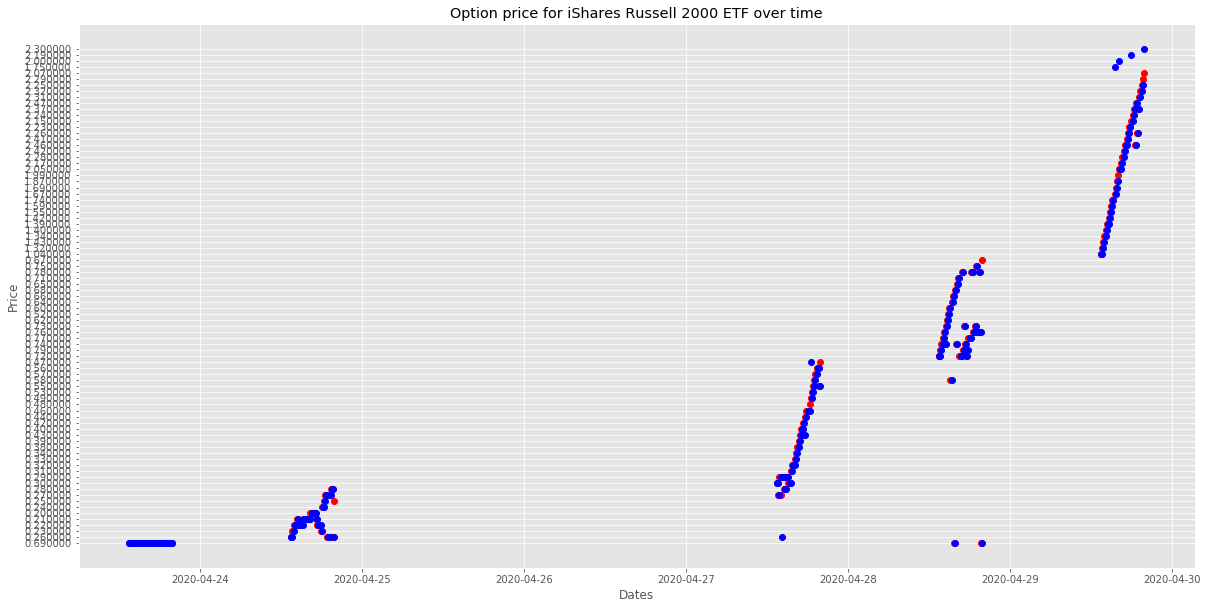

In [56]:
strike = 145.0
optionType = 'call'
span = 'week' #available options are day,week,year, and 5year
#!!!

historicalData = r.get_option_historicals(ticker,'2020-06-05',strike,optionType,span)

dates = []
closingPrices = []
openPrices = []

for item in historicalData['data_points']:
    #print(item)
    dates.append(item['begins_at'])
    closingPrices.append(item['close_price'])
    openPrices.append(item['open_price'])


#!!! I made it so it only got the last 30 days but you could delete these lines to get full year.
# dates = dates[-30:]
# closingPrices = closingPrices[-30:]
# openPrices = openPrices[-30:]
#

# change the dates into a format that matplotlib can recognize.
x = [dt.datetime.strptime(d,'%Y-%m-%dT%H:%M:%SZ') for d in dates]

# plots the data.
plt.plot(x, closingPrices, 'ro')
plt.plot(x, openPrices, 'bo')
plt.title("Option price for "+r.get_name_by_symbol(ticker)+" over time")
plt.xlabel("Dates")
plt.ylabel("Price")
plt.show()

In [34]:
import pandas as pd
historicalData = r.get_option_historicals(ticker,expiration_dates[3],strike,optionType,span)
df = pd.DataFrame(historicalData['data_points'])
#df


In [57]:
strike = 145.0
optionType = 'call'
span = 'day' #Span must be "day","week","year",or "5year"
historicalData = r.get_option_historicals(ticker,'2020-06-05',strike,optionType,span)
historicalData
df = pd.DataFrame(historicalData['data_points'])
#df

Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...
Loading page 6 ...
Loading page 7 ...
Loading page 8 ...
Loading page 9 ...
Loading page 10 ...
Loading page 11 ...
Loading page 12 ...
Loading page 13 ...
Loading page 14 ...
Loading page 15 ...
Loading page 16 ...
Loading page 17 ...
Loading page 18 ...
Loading page 19 ...
Loading page 20 ...
Loading page 21 ...
Loading page 22 ...
Loading page 23 ...


In [58]:
import plotly.graph_objs as go
import plotly.figure_factory.utils as utils

fig = go.Figure([go.Scatter(x=df['begins_at'], y=df['open_price'])])
fig.show()

In [35]:
import plotly.express as px

df = px.data.gapminder().query("continent=='Oceania'")
# 	country	continent	year	lifeExp	pop	gdpPercap	iso_alpha	iso_num
# 60	Australia	Oceania	1952	69.120	8691212	10039.59564	AUS	36
# 61	Australia	Oceania	1957	70.330	9712569	10949.64959	AUS	36
fig = px.line(df, x="year", y="lifeExp", color='country')
fig.show()

In [59]:
strike = 145.0
optionType = 'call'
span = 'week' #Span must be "day","week","year",or "5year"
historicalData = r.get_option_historicals(ticker,'2020-06-05',strike,optionType,span)
historicalData
df1 = pd.DataFrame(historicalData['data_points'])
df1['strike'] = strike


Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...
Loading page 6 ...
Loading page 7 ...
Loading page 8 ...
Loading page 9 ...
Loading page 10 ...
Loading page 11 ...
Loading page 12 ...
Loading page 13 ...
Loading page 14 ...
Loading page 15 ...
Loading page 16 ...
Loading page 17 ...
Loading page 18 ...
Loading page 19 ...
Loading page 20 ...
Loading page 21 ...
Loading page 22 ...
Loading page 23 ...


In [63]:
strike = 135.0
optionType = 'call'
#span = 'day' #Span must be "day","week","year",or "5year"
historicalData = r.get_option_historicals(ticker,'2020-06-05',strike,optionType,span)
historicalData
df2 = pd.DataFrame(historicalData['data_points'])
df2['strike'] = strike
df = pd.DataFrame.append(df1,df2)
#df

Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...
Loading page 6 ...
Loading page 7 ...
Loading page 8 ...
Loading page 9 ...
Loading page 10 ...
Loading page 11 ...
Loading page 12 ...
Loading page 13 ...
Loading page 14 ...
Loading page 15 ...
Loading page 16 ...
Loading page 17 ...
Loading page 18 ...
Loading page 19 ...
Loading page 20 ...
Loading page 21 ...
Loading page 22 ...
Loading page 23 ...


In [64]:

fig = px.line(df, x='begins_at',y="high_price", color='strike')
#fig = px.line(df, x="year", y="lifeExp", color='country')

fig.show()